In [ ]:
#! pip install fastai
#! pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 3.4 MB/s eta 0:00:00a 0:00:01


In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from fastai import *
from fastai.tabular import *
from fastai.tabular.all import *

In [3]:
train_df=pd.read_csv("../sample_data/train.csv",low_memory=False)
test_df=pd.read_csv("../sample_data/test.csv",low_memory=False)

In [4]:
train_df.head()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0


In [5]:
## clean dataset

In [6]:
train_df.columns

Index(['id', 'date', 'city', 'lat', 'long', 'pop', 'shop', 'brand',
       'container', 'capacity', 'price', 'quantity'],
      dtype='object')

In [7]:
# Remove rows where all elements are NaN
org_train_len=len(train_df)
train_df = train_df.dropna(how='all')
clean_train_len=len(train_df)
org_test_len=len(test_df)
test_df = test_df.dropna(how='all')
clean_test_len=len(test_df)

In [8]:
org_train_len,clean_train_len,org_test_len,clean_test_len

(7560, 6480, 1080, 1080)

In [9]:
# Convert the date column to datetime
train_df['date'] = pd.to_datetime(train_df['date'], errors='coerce')
# Count the number of NaN values in the date column
nan_count = train_df['date'].isna().sum()
len(train_df),nan_count

/var/folders/1m/ps1kwqdn5p1bdj1943362s500000gq/T/ipykernel_72072/893165529.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df['date'] = pd.to_datetime(train_df['date'], errors='coerce')


(6480, 0)

In [10]:
# Define a conversion function with NaN handling
def convert_to_liters(value):
    # Check for NaN (or similar) values
    if pd.isna(value):
        # Choose your strategy here: return None, or a default value, or raise an error, etc.
        return np.nan  # Here, we choose to return NaN as is
    # Split the number and unit
    number, unit = float(value[:-2]), value[-2:]
    # Convert to liters if necessary
    if unit == 'ml':
        return number / 1000  # Convert ml to l
    elif unit == 'lt':
        return number
    else:
        raise ValueError(f"Unknown unit: {unit}")

In [11]:
# Apply the conversion to the entire column
train_df['capacity_liters'] = train_df['capacity'].apply(convert_to_liters)
test_df['capacity_liters'] = test_df['capacity'].apply(convert_to_liters)


In [12]:
train_df

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity,capacity_liters
0,0.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0,0.50
1,1.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0,1.50
2,2.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0,0.33
3,3.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0,0.50
4,4.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,6475.0,2017-12-31,Athens,37.96245,23.68708,665871.0,shop_3,orange-power,plastic,1.5lt,1.02,33201.0,1.50
6476,6476.0,2017-12-31,Larisa,39.63689,22.41761,144302.0,shop_5,orange-power,can,330ml,0.47,46971.0,0.33
6477,6477.0,2017-12-31,Patra,38.24444,21.73444,168501.0,shop_6,adult-cola,glass,500ml,1.02,47708.0,0.50
6478,6478.0,2017-12-31,Thessaloniki,40.64361,22.93086,353001.0,shop_4,gazoza,plastic,1.5lt,1.34,27115.0,1.50


In [14]:
train_df = train_df.drop(columns=['capacity'])
test_df = test_df.drop(columns=['capacity'])


In [15]:
add_datepart(train_df, 'date')
add_datepart(test_df,'date')

/opt/anaconda3/envs/ML_OPS/lib/python3.10/site-packages/fastai/tabular/core.py:23: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[date_field] = pd.to_datetime(df[date_field], infer_datetime_format=True)
/opt/anaconda3/envs/ML_OPS/lib/python3.10/site-packages/fastai/tabular/core.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_field] = pd.to_datetime(df[date_field], infer_datetime_format=True)


,id,city,lat,long,pop,shop,brand,container,price,quantity,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,6480,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,3.10,7056,...,31,2,31,True,False,False,False,False,False,1.517357e+09
1,6481,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,can,0.85,12490,...,31,2,31,True,False,False,False,False,False,1.517357e+09
2,6482,Athens,37.97945,23.71622,664046,shop_1,adult-cola,glass,0.83,26640,...,31,2,31,True,False,False,False,False,False,1.517357e+09
3,6483,Athens,37.97945,23.71622,664046,shop_1,orange-power,glass,0.54,41892,...,31,2,31,True,False,False,False,False,False,1.517357e+09
4,6484,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,0.83,22923,...,31,2,31,True,False,False,False,False,False,1.517357e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,7555,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,2.52,13760,...,31,0,365,True,False,True,False,True,False,1.546214e+09
1076,7556,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,2.18,16309,...,31,0,365,True,False,True,False,True,False,1.546214e+09
1077,7557,Patra,38.24444,21.73444,168034,shop_6,kinder-cola,can,0.85,24378,...,31,0,365,True,False,True,False,True,False,1.546214e+09
1078,7558,Thessaloniki,40.64361,22.93086,354290,shop_4,adult-cola,plastic,2.17,20691,...,31,0,365,True,False,True,False,True,False,1.546214e+09


In [31]:
train_df['quantity'] = np.log(train_df['quantity'])
test_df['quantity'] = np.log(test_df['quantity'])

In [32]:
train_df.columns

Index(['id', 'city', 'lat', 'long', 'pop', 'shop', 'brand', 'container',
       'price', 'quantity', 'capacity_liters', 'Year', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Elapsed'],
      dtype='object')

In [33]:
cat_names = ['city', 'shop', 'brand', 'container']
cont_names = ['lat', 'long', 'pop','capacity_liters','price']
procs = [Categorify, FillMissing, Normalize]
y_names = 'quantity'

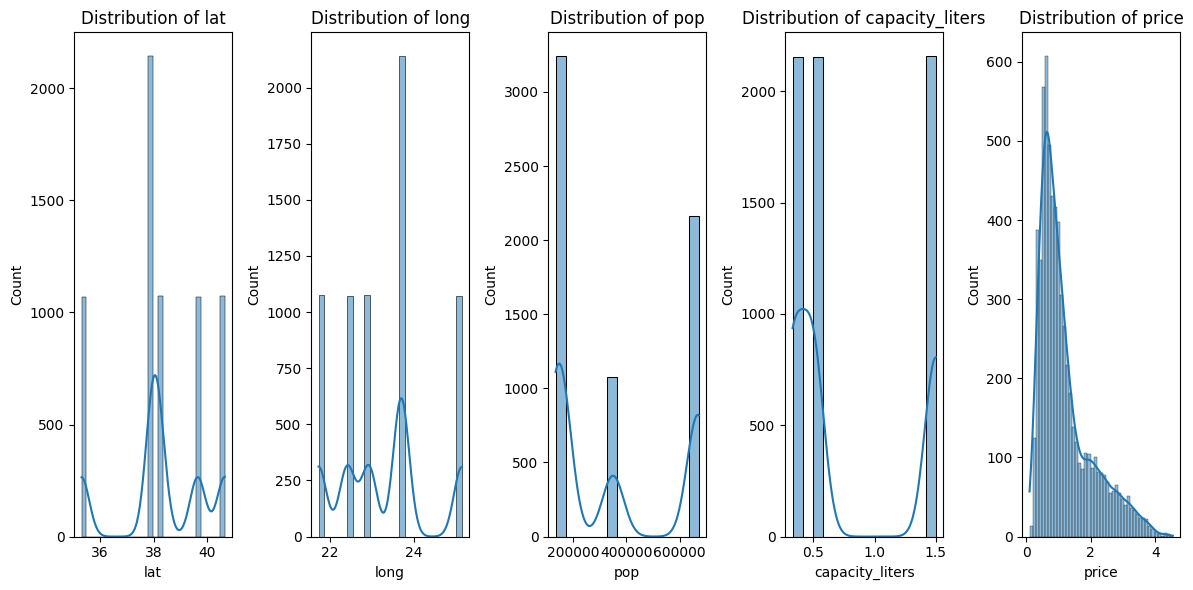

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Iterate through the continuous variables
for i, column in enumerate(cont_names, 1):
    plt.subplot(1, len(cont_names), i)
    sns.histplot(train_df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [35]:

to = TabularPandas(train_df, procs=procs, cat_names=cat_names, cont_names=cont_names,y_block=RegressionBlock(),
                   y_names=y_names)

In [1]:
type(to)

NameError: name 'to' is not defined

In [43]:
dls = to.dataloaders(bs=32)

In [44]:
dls.show_batch()


,city,shop,brand,container,lat_na,long_na,capacity_liters_na,lat,long,pop,capacity_liters,price,quantity
0,Thessaloniki,shop_4,lemon-boost,glass,False,False,False,40.643608,22.930861,351701.999974,0.50,1.02,10.317516
1,Athens,shop_1,orange-power,glass,False,False,False,37.979450,23.716221,668203.013500,0.50,0.85,10.505643
2,Irakleion,shop_2,orange-power,can,False,False,False,35.327869,25.143410,137301.997095,0.33,0.58,10.498139
3,Larisa,shop_5,lemon-boost,can,False,False,False,39.636890,22.417610,142030.006780,0.33,0.44,10.264688
4,Larisa,shop_5,lemon-boost,glass,False,False,False,39.636890,22.417610,139242.002220,0.50,1.14,9.667512
5,Patra,shop_6,kinder-cola,plastic,False,False,False,38.244438,21.734440,164250.006535,1.50,3.32,9.659631
6,Athens,shop_1,adult-cola,can,False,False,False,37.979450,23.716221,665870.994236,0.33,0.58,10.700680
7,Thessaloniki,shop_4,lemon-boost,can,False,False,False,40.643608,22.930861,353000.999969,0.33,0.62,10.446974
8,Larisa,shop_5,orange-power,glass,False,False,False,39.636890,22.417610,137539.994777,0.50,0.57,10.406714
9,Patra,shop_6,kinder-cola,can,False,False,False,38.244438,21.734440,167241.997214,0.33,0.65,10.642945


In [45]:
max_log_y = np.max(train_df['quantity'])*1.2

In [46]:
y_range = torch.tensor([0, max_log_y]); y_range

tensor([ 0.0000, 14.2638], dtype=torch.float64)

In [47]:
tc = tabular_config(ps=[0.001, 0.01], embed_p=0.04, y_range=y_range)
learn = tabular_learner(dls, layers=[1000,500],
                        metrics=exp_rmspe,
                        config=tc,
                        loss_func=MSELossFlat())

In [48]:
learn.summary()

TabularModel (Input shape: 32 x 7)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 4              
Embedding                                 24         True      
____________________________________________________________________________
                     32 x 5              
Embedding                                 35         True      
____________________________________________________________________________
                     32 x 4              
Embedding                                 24         True      
____________________________________________________________________________
                     32 x 3              
Embedding                                 12         True      
Embedding                                 9          True      
Embedding                                 9          True      
Embedding                                 9          True      
Dropout                                               

SuggestedLRs(valley=0.0014454397605732083)

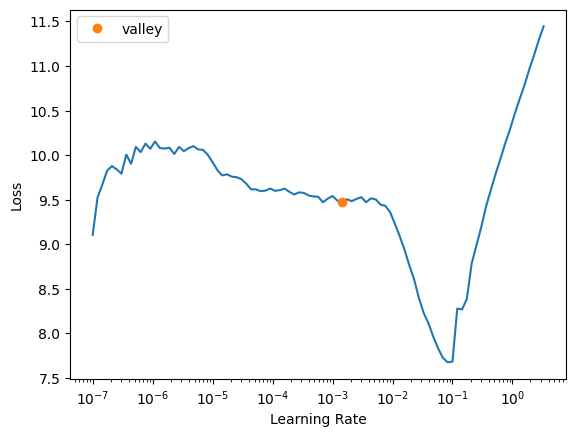

In [49]:
learn.lr_find()

In [50]:
learn.fit_one_cycle(5, 0.001, wd=0.2)

/opt/anaconda3/envs/ML_OPS/lib/python3.10/site-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/opt/anaconda3/envs/ML_OPS/lib/python3.10/site-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/opt/anaconda3/envs/ML_OPS/lib/python3.10/site-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/opt/anaconda3/envs/ML_OPS/lib/python3.10/site-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/opt/anaconda3/envs/ML_OPS/lib/python3.10/site-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


In [51]:
## predictions

In [52]:
dl = learn.dls.test_dl(test_df)

In [53]:
raw_test_preds = learn.get_preds(dl=dl)

In [54]:
raw_test_preds

(tensor([[ 9.2538],
         [ 9.6491],
         [10.4040],
         ...,
         [10.0519],
         [10.1537],
         [10.1005]]),
 tensor([[ 8.8616],
         [ 9.4327],
         [10.1902],
         ...,
         [10.1014],
         [ 9.9375],
         [10.1111]]))

In [55]:
test_preds = np.exp(raw_test_preds[0]).numpy().T[0]

In [56]:
test_preds

array([10443.754, 15507.164, 32990.582, ..., 23199.203, 25685.62 ,
       24355.14 ], dtype=float32)

In [58]:
test_gt=np.exp(test_df['quantity'])

In [59]:
test_gt

0        7056.0
1       12490.0
2       26640.0
3       41892.0
4       22923.0
         ...   
1075    13760.0
1076    16309.0
1077    24378.0
1078    20691.0
1079    24615.0
Name: quantity, Length: 1080, dtype: float64

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import numpy as np

In [63]:

y_true =  test_gt  
y_pred = test_preds

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R^2
r_squared = r2_score(y_true, y_pred)
print(f"R-squared (R^2): {r_squared}")

Mean Absolute Error (MAE): 6764.160280580873
Mean Squared Error (MSE): 90556770.42272234
Root Mean Squared Error (RMSE): 9516.132114610555
R-squared (R^2): 0.6538774261669125
